In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import collections

import sys
sys.path.append('../Tianwen')

import ccsds

from construct import *

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

## AOS frames

The frames are AOS frames using spacecraft ID `0xb3`. Only virtual channel 0 is in use. There is no M_PDU header or OCF.

The payload of the frames starts with what appears to be a 32-bit frame counter. The following few bytes have constant or toggling values. There is no indication that Space Packets are used.

In [2]:
TMFrame = Struct(
    'primary_header' / ccsds.AOSPrimaryHeader,
    'payload' / Bytes(220 - 6),
)

In [3]:
frames = np.fromfile('queqiao2_frames.u8', 'uint8').reshape(-1, 220)

In [4]:
tm = [TMFrame.parse(f) for f in frames]
scid = [a.primary_header.spacecraft_id for a in tm]
vcid = np.array([a.primary_header.virtual_channel_id for a in tm])
vcfc = np.array([a.primary_header.virtual_channel_frame_count for a in tm])
[a.primary_header for a in tm[:5]]

[Container(transfer_frame_version_number=1, spacecraft_id=179, virtual_channel_id=0, virtual_channel_frame_count=10242, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=179, virtual_channel_id=0, virtual_channel_frame_count=10243, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=179, virtual_channel_id=0, virtual_channel_frame_count=10244, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=179, virtual_channel_id=0, virtual_channel_frame_count=10245, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=179, virtual_channel_id=0, virtual_channel_frame_count=10246, replay_flag=False, vc_frame_count_usage_

In [5]:
collections.Counter(scid)

Counter({179: 72})

In [6]:
hex(179)

'0xb3'

In [7]:
collections.Counter(vcid)

Counter({0: 72})

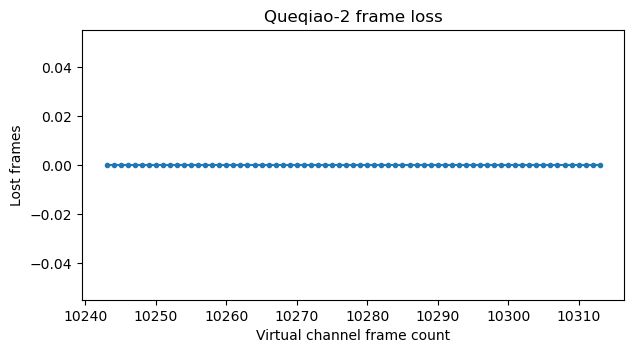

In [8]:
plt.plot(vcfc[1:], np.diff(vcfc) - 1, '.-')
plt.title('Queqiao-2 frame loss')
plt.xlabel('Virtual channel frame count')
plt.ylabel('Lost frames');

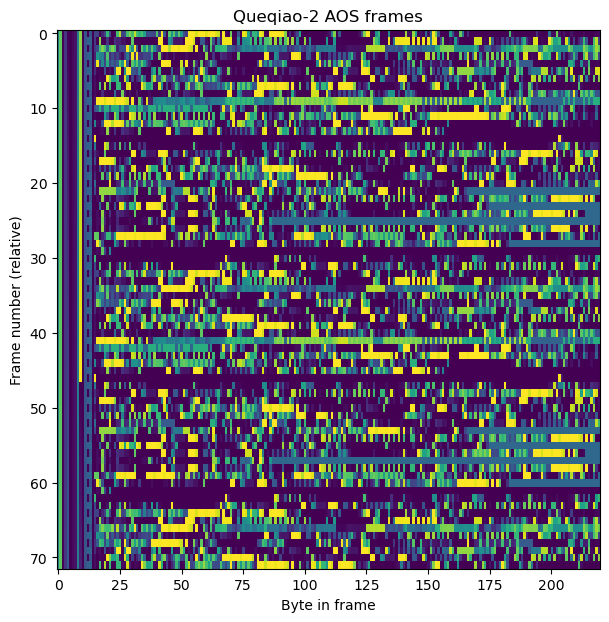

In [9]:
plt.figure(figsize=(7, 7))
plt.imshow(frames, aspect='auto', interpolation='none')
plt.title('Queqiao-2 AOS frames')
plt.xlabel('Byte in frame')
plt.ylabel('Frame number (relative)');

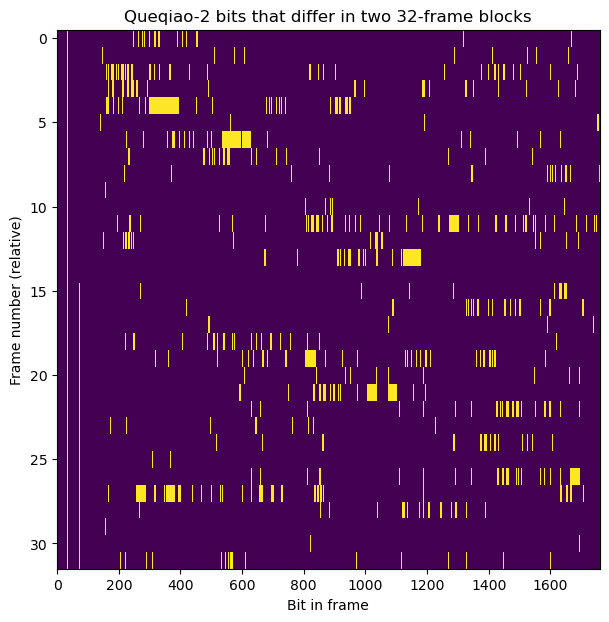

In [10]:
plt.figure(figsize=(7, 7))
plt.imshow(np.unpackbits(frames[32:64], axis=1) ^ np.unpackbits(frames[:32], axis=1), aspect='auto', interpolation='none')
plt.title('Queqiao-2 bits that differ in two 32-frame blocks')
plt.xlabel('Bit in frame')
plt.ylabel('Frame number (relative)');

In [11]:
timestamps = frames[:, 6:6+4].view('uint32').byteswap().ravel()
np.datetime64('2024-03-20T04:05') - np.timedelta64(1, 's') * timestamps

array(['2020-12-31T16:00:27', '2020-12-31T16:00:26',
       '2020-12-31T16:00:25', '2020-12-31T16:00:24',
       '2020-12-31T16:00:23', '2020-12-31T16:00:22',
       '2020-12-31T16:00:21', '2020-12-31T16:00:20',
       '2020-12-31T16:00:19', '2020-12-31T16:00:18',
       '2020-12-31T16:00:17', '2020-12-31T16:00:16',
       '2020-12-31T16:00:15', '2020-12-31T16:00:14',
       '2020-12-31T16:00:13', '2020-12-31T16:00:12',
       '2020-12-31T16:00:11', '2020-12-31T16:00:10',
       '2020-12-31T16:00:09', '2020-12-31T16:00:08',
       '2020-12-31T16:00:07', '2020-12-31T16:00:06',
       '2020-12-31T16:00:05', '2020-12-31T16:00:04',
       '2020-12-31T16:00:03', '2020-12-31T16:00:02',
       '2020-12-31T16:00:01', '2020-12-31T16:00:00',
       '2020-12-31T15:59:59', '2020-12-31T15:59:58',
       '2020-12-31T15:59:57', '2020-12-31T15:59:56',
       '2020-12-31T15:59:55', '2020-12-31T15:59:54',
       '2020-12-31T15:59:53', '2020-12-31T15:59:52',
       '2020-12-31T15:59:51', '2020-12-31T15:5

In [12]:
frames[:, 6]

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6], dtype=uint8)

In [13]:
frames[:, 6+1]

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12], dtype=uint8)

In [14]:
frames[:, 6+2]

array([106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 107, 107, 107, 107, 107,
       107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107,
       107, 107, 107, 107, 107, 107, 107], dtype=uint8)

In [15]:
frames[:, 6+3]

array([209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255,   0,   1,   2,   3,   4,
         5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24], dtype=uint8)

In [16]:
frames[:, 6+4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
frames[:, 6+5]

array([68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68,
       68, 68, 68, 68], dtype=uint8)

In [18]:
frames[:, 6+6]

array([ 0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0,
       78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,
        0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0,
       78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,  0, 78,
        0, 78,  0, 78], dtype=uint8)

In [19]:
frames[:, 6+7]

array([64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64,
       82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82,
       64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64,
       82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82, 64, 82,
       64, 82, 64, 82], dtype=uint8)

In [20]:
frames[:, 6+8]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)